<a href="https://colab.research.google.com/github/jnsbrdbr/andrew-ng/blob/master/logesticregressionipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.7.0


In [28]:
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd
import io
import seaborn as sns

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
import matplotlib.pyplot as plt

In [29]:
!wget https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex2data1.txt

data = pd.read_csv('ex2data1.txt',header=None,error_bad_lines=False, delimiter=',')

--2021-11-11 09:24:18--  https://raw.githubusercontent.com/susilvaalmeida/machine-learning-andrew-ng/master/data/ex2data1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘ex2data1.txt.6’

ex2data1.txt.6      100%[===================>]   3.69K  --.-KB/s    in 0s      

2021-11-11 09:24:18 (41.9 MB/s) - ‘ex2data1.txt.6’ saved [3775/3775]



In [41]:
#show the data
data.columns=['exam_score1','exam_score2','label']
data.describe().T


,count,mean,std,min,25%,50%,75%,max
exam_score1,100.0,65.644274,19.458222,30.058822,50.919511,67.032988,80.212529,99.827858
exam_score2,100.0,66.221998,18.582783,30.603263,48.179205,67.682381,79.360605,98.869436
label,100.0,0.600000,0.492366,0.000000,0.000000,1.000000,1.000000,1.000000


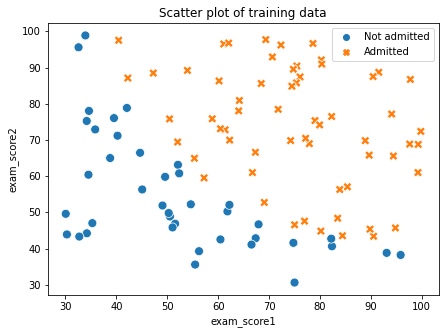

In [42]:
#plot the data
#1.size
#2.detemine x,y summon data
plt.figure(figsize=(7,5))
ax=sns.scatterplot(x='exam_score1',y='exam_score2',hue='label',style='label',data=data,s=80)
handles,labels=ax.get_legend_handles_labels()
ax.legend(handles[0:], ['Not admitted', 'Admitted'])
plt.title('Scatter plot of training data')
plt.show()

In [53]:
#warmupexercise:sigmoid
def sigmoid(z):
  z=np.array(z)
  return 1/(1+np.exp(-z))

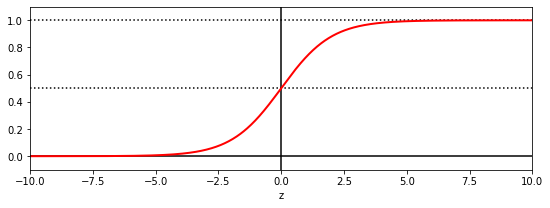

In [57]:
#plot sigmoid
z = np.linspace(-10, 10, 1000)
sig = sigmoid(z)
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(z, sig, "r-", linewidth=2)
plt.xlabel("z")
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [92]:
def computecost(theta,x,y):
  m=data.shape[0]
  theta = theta[:, np.newaxis]
  h=sigmoid(x.dot(theta))
  j=(1/m) * (-y.T.dot(np.log(h))- (1-y).T.dot(np.log(1-h)))
  diff_hy = h - y
  grad= (1/m) * diff_hy.T.dot(x)
  return j,grad

In [95]:
m = data.shape[0]
x = np.hstack((np.ones((m,1)),data[['exam_score1', 'exam_score2']].values))
y = np.array(data.label.values).reshape(-1,1)
theta1 = np.zeros(shape=(data.shape[1]))
print(theta1)

[0. 0. 0.]


In [99]:
cost,grad=computecost(theta1,x,y)
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad.T)

Cost at initial theta (zeros): [[0.69314718]]
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [100]:
import scipy.optimize as opt
def optimize_theta(x,y,theta1):
  opt_result=opt.minimize(computecost, theta1, args=(x, y), method='TNC',
                               jac=True, options={'maxiter':400})
  return opt_result['x'], opt_result['fun']

In [101]:
opt_theta, cost = optimize_theta(x, y, theta1)

In [102]:
print('Cost at theta found by fminunc:', cost)
print('Expected cost (approx): 0.203')
print('theta:\n', opt_theta.reshape(-1,1))
print('Expected theta (approx):')
print(' -25.161\n 0.206\n 0.201')

Cost at theta found by fminunc: [[0.2034977]]
Expected cost (approx): 0.203
theta:
 [[-25.16131865]
 [  0.20623159]
 [  0.20147149]]
Expected theta (approx):
 -25.161
 0.206
 0.201


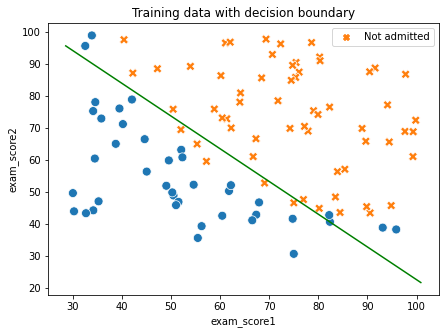

In [105]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x='exam_score1', y='exam_score2', hue='label', data=data, style='label', s=80)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], ['Not admitted', 'Admitted'])
plt.title('Training data with decision boundary')

plot_x = np.array([min(x[:,2])-2,  max(x[:,2])+2])
plot_y = -((opt_theta[1]/opt_theta[2])*plot_x + (opt_theta[0]/opt_theta[2]))
plt.plot(plot_x, plot_y, '-', c="green")
plt.show(ax)

In [106]:
#probability
prob = sigmoid(np.array([1, 45, 85]).dot(opt_theta))
print('For a student with scores 45 and 85, we predict an admission probability of', prob)
print('Expected value: 0.775 +/- 0.002');

For a student with scores 45 and 85, we predict an admission probability of 0.7762906229081791
Expected value: 0.775 +/- 0.002


In [119]:
def predict(X,theta):
  y_pred = [1 if sigmoid(X[i, :].dot(theta)) >= 0.5 else 0 for i in range(0, X.shape[0])]
  return y_pred
 

In [113]:
X = np.hstack((np.ones((m,1)),data[['exam_score1', 'exam_score2']].values))
y_pred_prob = predict(X, opt_theta)
f'Train accuracy: {np.mean(y_pred_prob == data.label.values) * 100}'

'Train accuracy: 89.0'